In [1]:
import time

from IPython.core.display import display
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(color_codes=True)
sns.set(font='Osaka')

In [6]:
# Load the data

data_dir = '../data/'
train_data = 'train.csv'
test_data = 'test.csv'

t0 = time.time()
df_train = pd.read_csv(data_dir + train_data)
df_test = pd.read_csv(data_dir + test_data)
print('Time = ', time.time() - t0, ' seconds')

print('Train shape: ', df_train.shape)
print('Test shape: ', df_test.shape)

df_train_test = pd.concat([df_train, df_test])
print('Train Test shape: ', df_train_test.shape)

Time =  7.963533878326416  seconds
Train shape:  (188318, 132)
Test shape:  (125546, 131)
Train Test shape:  (313864, 132)


In [3]:
# Check the sample of the train data
df_train.head()

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
0,1,A,B,A,B,A,A,A,A,B,...,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,2213.18
1,2,A,B,A,A,A,A,A,A,B,...,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,1283.60
2,5,A,B,A,A,B,A,A,A,B,...,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425,3005.09
3,10,B,B,A,B,A,A,A,A,B,...,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642,939.85
4,11,A,B,A,B,A,A,A,A,B,...,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606,2763.85


In [4]:
# How many categorical or numerical features we have?
categorical_features = [col for col in df_train.columns if 'cat' in col]
print('# of categorical features: ', len(categorical_features))

numerical_features = [col for col in df_train.columns if 'cont' in col]
print('# of numerical features: ', len(numerical_features))

# of categorical features:  116
# of numerical features:  14


## Overview of the target variable `loss`

In [23]:
df_train['loss'].describe()

count    188318.000000
mean       3037.337686
std        2904.086186
min           0.670000
25%        1204.460000
50%        2115.570000
75%        3864.045000
max      121012.250000
Name: loss, dtype: float64

## Overview of the categorical features

In [19]:
# Check the unique values of each categorical feature
for cat_feature in categorical_features:
    print(cat_feature, df_train_test[cat_feature].unique())


# NOTE:
# cat1 ~ cat72: A, B
# cat73 ~ cat76: A, B, C
# cat77 ~ cat87: from A to D
# cat88: A, B, D, E
# cat89 ~ cat108, cat111, cat114, cat115: 5 categories or more, single letter
# cat109, cat110, cat112, cat113, cat116: 2-letter, Basically *Z don't appear (only cat109 has ZZ)

cat1 ['A' 'B']
cat2 ['B' 'A']
cat3 ['A' 'B']
cat4 ['B' 'A']
cat5 ['A' 'B']
cat6 ['A' 'B']
cat7 ['A' 'B']
cat8 ['A' 'B']
cat9 ['B' 'A']
cat10 ['A' 'B']
cat11 ['B' 'A']
cat12 ['A' 'B']
cat13 ['A' 'B']
cat14 ['A' 'B']
cat15 ['A' 'B']
cat16 ['A' 'B']
cat17 ['A' 'B']
cat18 ['A' 'B']
cat19 ['A' 'B']
cat20 ['A' 'B']
cat21 ['A' 'B']
cat22 ['A' 'B']
cat23 ['B' 'A']
cat24 ['A' 'B']
cat25 ['A' 'B']
cat26 ['A' 'B']
cat27 ['A' 'B']
cat28 ['A' 'B']
cat29 ['A' 'B']
cat30 ['A' 'B']
cat31 ['A' 'B']
cat32 ['A' 'B']
cat33 ['A' 'B']
cat34 ['A' 'B']
cat35 ['A' 'B']
cat36 ['A' 'B']
cat37 ['A' 'B']
cat38 ['A' 'B']
cat39 ['A' 'B']
cat40 ['A' 'B']
cat41 ['A' 'B']
cat42 ['A' 'B']
cat43 ['A' 'B']
cat44 ['A' 'B']
cat45 ['A' 'B']
cat46 ['A' 'B']
cat47 ['A' 'B']
cat48 ['A' 'B']
cat49 ['A' 'B']
cat50 ['A' 'B']
cat51 ['A' 'B']
cat52 ['A' 'B']
cat53 ['A' 'B']
cat54 ['A' 'B']
cat55 ['A' 'B']
cat56 ['A' 'B']
cat57 ['A' 'B']
cat58 ['A' 'B']
cat59 ['A' 'B']
cat60 ['A' 'B']
cat61 ['A' 'B']
cat62 ['A' 'B']
cat63 ['A' 'B']
c

## Overview of the continuous features

In [8]:
continuous_features = [col for col in df_train.columns if 'cont' in col]
print('# of continuous features = ', len(continuous_features))

# of continuous features =  14


In [10]:
# Basic descriptions of the continuous features

print('Train data description: ')
display(df_train[continuous_features].describe())
print('Test data description: ')
display(df_test[continuous_features].describe())

# NOTE:
# The distributions of the train data is similar to that of the test data. 
# The corresponding continuous features in those two dataset have almost the same distribution respectively.
# Therefore, we don't have to concern about the problem resulting from distribution differences between train data and test data.

Train data description: 


,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
count,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000
mean,0.493861,0.507188,0.498918,0.491812,0.487428,0.490945,0.484970,0.486437,0.485506,0.498066,0.493511,0.493150,0.493138,0.495717
std,0.187640,0.207202,0.202105,0.211292,0.209027,0.205273,0.178450,0.199370,0.181660,0.185877,0.209737,0.209427,0.212777,0.222488
min,0.000016,0.001149,0.002634,0.176921,0.281143,0.012683,0.069503,0.236880,0.000080,0.000000,0.035321,0.036232,0.000228,0.179722
25%,0.346090,0.358319,0.336963,0.327354,0.281143,0.336105,0.350175,0.312800,0.358970,0.364580,0.310961,0.311661,0.315758,0.294610
50%,0.475784,0.555782,0.527991,0.452887,0.422268,0.440945,0.438285,0.441060,0.441450,0.461190,0.457203,0.462286,0.363547,0.407403
75%,0.623912,0.681761,0.634224,0.652072,0.643315,0.655021,0.591045,0.623580,0.566820,0.614590,0.678924,0.675759,0.689974,0.724623
max,0.984975,0.862654,0.944251,0.954297,0.983674,0.997162,1.000000,0.980200,0.995400,0.994980,0.998742,0.998484,0.988494,0.844848


Test data description: 


,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
count,125546.000000,125546.000000,125546.000000,125546.000000,125546.000000,125546.000000,125546.000000,125546.000000,125546.000000,125546.000000,125546.000000,125546.000000,125546.000000,125546.000000
mean,0.494447,0.506939,0.498255,0.492334,0.487640,0.492188,0.485945,0.487401,0.486015,0.498909,0.494360,0.494033,0.495086,0.495586
std,0.187961,0.206837,0.201746,0.210815,0.209119,0.205574,0.178650,0.199549,0.182134,0.185950,0.210399,0.210148,0.213108,0.222613
min,0.000016,0.001149,0.002634,0.176921,0.281143,0.012683,0.069503,0.236880,0.000080,0.000000,0.035321,0.036232,0.000228,0.178568
25%,0.347403,0.358319,0.336963,0.327354,0.281143,0.336105,0.352087,0.317960,0.358970,0.364580,0.310961,0.318249,0.315758,0.294752
50%,0.475784,0.555782,0.527991,0.452887,0.422268,0.441525,0.438893,0.441060,0.441450,0.466720,0.457203,0.462286,0.363547,0.406104
75%,0.626630,0.681761,0.634224,0.652072,0.643315,0.659261,0.591284,0.629180,0.568890,0.619840,0.678924,0.682413,0.689974,0.724791
max,0.984975,0.862654,0.944251,0.956046,0.983107,0.997162,1.000000,0.982800,0.995400,0.994980,0.997830,0.997416,0.988494,0.844814


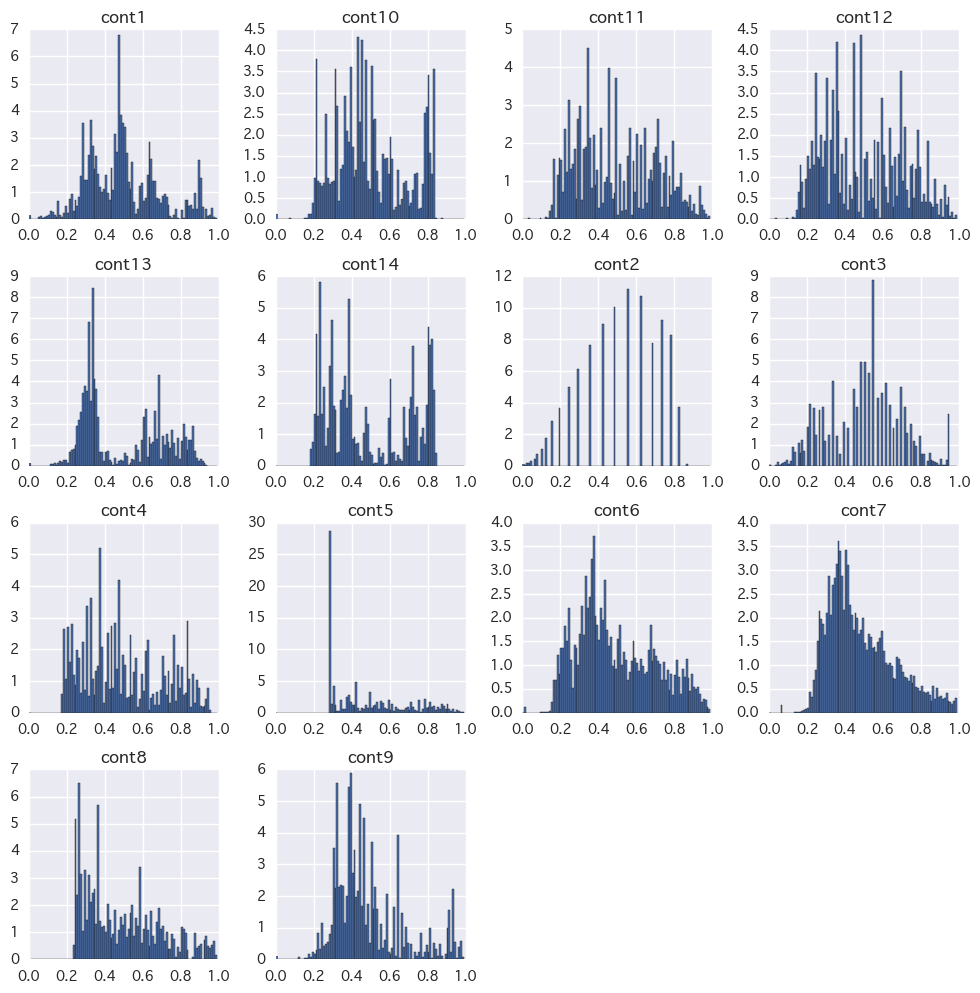

In [26]:
# Check the distributions of the continuous features visually

figsize = (12, 12)
bins=np.arange(0, 1, 0.01)
df_train_test[continuous_features].hist(figsize=figsize, normed=True, bins=bins)

plt.show()